<div style="border:solid green 4px; padding: 20px">Hello! My critical comments are highlighted with <span style='color: red;'>red</span>,  less urgent remarks are in <span style='color: #ebd731;'>yellow</span>, recommendations and extra information - in <span style='color: green;'>green</span>.</div>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read and check the data.

In [4]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
users = pd.read_csv('/datasets/megaline_users1.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [5]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [7]:
calls[calls['duration'] == 0].count()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

I will accept the 0 duration as missed calls, because no minutes were used.
They will not directly contribute to the profit in my analysis.

<div style="border:solid green 4px; padding: 20px">I can agree with that.</div>

In [8]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [12]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Convert dates to datetime data type

In [14]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') 
#convert reg_date to datetime

In [15]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') 
#convert churn_date to datetime

In [16]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Create a report

Convert more dates to datetime, and create columns that only have the months.

In [17]:
users['reg_month'] = users['reg_date'].values.astype('datetime64[M]')

In [18]:
users['churn_month'] = users['churn_date'].values.astype('datetime64[M]')

Find the minimum and maximum month in the dataset.

In [19]:
min_month = users['reg_date'].values.astype('datetime64[M]').min()
max_month = users['reg_date'].values.astype('datetime64[M]').max()

In [20]:
(min_month, max_month)
#range of minimum and maximum

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [21]:
#I will create a dataframe of the all the months.

In [22]:
months = pd.DataFrame(pd.date_range(min_month, max_month, freq='MS'))
#create a dataframe of the months

In [23]:
months

,0
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [24]:
months.columns = ['month'] #rename the month column

In [25]:
len(users)*len(months) #check length of merging each user with each month

6000

I will create a similar key on each table to use during merging.

In [26]:
users['key'] = 1
months['key'] = 1
report = months.merge(users, on='key')


<div style="border:solid green 4px; padding: 20px">Pretty complicated way, but, well, okay.</div>

In [27]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month,key
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12-01,NaT,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08-01,NaT,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-10-01,NaT,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-01-01,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-05-01,NaT,1


In [28]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 12 columns):
month          6000 non-null datetime64[ns]
key            6000 non-null int64
user_id        6000 non-null int64
first_name     6000 non-null object
last_name      6000 non-null object
age            6000 non-null int64
city           6000 non-null object
reg_date       6000 non-null datetime64[ns]
plan           6000 non-null object
churn_date     408 non-null datetime64[ns]
reg_month      6000 non-null datetime64[ns]
churn_month    408 non-null datetime64[ns]
dtypes: datetime64[ns](5), int64(3), object(4)
memory usage: 609.4+ KB


Some users registered after the minimal date and others left before the maximum date.

So I will select only the months after a user registered.

In [29]:
len(report[report['month']>=report['reg_month']])

3355

In [30]:
len(report[report['month'] <= report['churn_month']])

366

In [31]:
report = report[report['month'] >= report['reg_month']] 

In [32]:
report = report[['month', 'key', 'user_id', 'city', 'plan', 'reg_month']] 
#select only required columns

In [33]:
# check a specific user
report[report['user_id'] == 1000]

,month,key,user_id,city,plan,reg_month
5500,2018-12-01,1,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2018-12-01


In [34]:
report[report['user_id'] == 1003]

,month,key,user_id,city,plan,reg_month
3,2018-01-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
503,2018-02-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
1003,2018-03-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
1503,2018-04-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
2003,2018-05-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
2503,2018-06-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
3003,2018-07-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
3503,2018-08-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
4003,2018-09-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01
4503,2018-10-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01


### Calls

The number of calls and minutes used by each user in each month

In [35]:
data = users[['user_id', 'city', 'plan']]
#take specific columns from users

I will merge on the user_id column, since it is common and keep the outer rows i.e. the calls' rows.

In [36]:
data_calls = data.merge(calls, how='outer', on='user_id')

In [37]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137754 entries, 0 to 137753
Data columns (total 6 columns):
user_id      137754 non-null int64
city         137754 non-null object
plan         137754 non-null object
id           137735 non-null object
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


In [38]:
data_calls.head()

,user_id,city,plan,id,call_date,duration
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_93,2018-12-27,8.52
1,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_145,2018-12-27,13.66
2,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_247,2018-12-27,14.48
3,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_309,2018-12-28,5.76
4,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_380,2018-12-30,4.22


In [39]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [40]:
data_calls['month'] = data_calls['call_date'].values.astype('datetime64[M]')
#create a month column of datetime

I will create a groupby dataframe which has the sum and count of calls for each user, in each month.

Number of calls per month:

In [41]:
calls_count = data_calls.groupby(['user_id', 'month'])[['duration']].agg(['count']).reset_index()

In [42]:
calls_count.head()

,user_id,month,duration
,,,count
0,1000,2018-12-01,16
1,1001,2018-08-01,27
2,1001,2018-09-01,49
3,1001,2018-10-01,65
4,1001,2018-11-01,64


Minutes used per month:

In [43]:
calls_month = data_calls.groupby(['user_id', 'month'])[['duration']].agg(['sum']).reset_index()
calls_month.columns = ['user_id', 'month', 'total_duration']

In [44]:
calls_month.sample(10)

,user_id,month,total_duration
86,1026,2018-07-01,152.12
1377,1305,2018-07-01,449.77
381,1081,2018-05-01,280.07
39,1010,2018-05-01,497.94
1755,1385,2018-10-01,450.82
463,1099,2018-10-01,486.99
1085,1236,2018-10-01,543.79
527,1113,2018-09-01,469.29
2057,1453,2018-12-01,251.44
191,1048,2018-09-01,247.86


I will select each user and their plan to populate the calls dataframe.

In [45]:
user_plan = users[['user_id', 'plan']]
user_plan[user_plan['user_id'] == 1233] #testing

,user_id,plan
233,1233,surf


I will merge the user_plan with the calls data so as to find each users plan in each month.

In [46]:
calls_month = calls_month.merge(user_plan, on='user_id', how='left')

In [47]:
plans
#look at plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


I will create a dataframe for amount of mintes included in each plan.

In [48]:
call_plan = plans[['plan_name', 'minutes_included']]
call_plan.columns = ['plan', 'plan_minutes']

In [49]:
call_plan
#check

,plan,plan_minutes
0,surf,500
1,ultimate,3000


I will merge each user with their minutes included for their plan, in each month.

In [50]:
calls_month = calls_month.merge(call_plan, on='plan', how='left')

I will calculate the extra minutes used every month according to plan package.

In [51]:
calls_month['extra_mins'] = calls_month['total_duration'] - calls_month['plan_minutes']

The negative values in the extra minutes spent mean that the user did not exceed the limit, whereas the +ve values mean that the user exceeded the monthly minutes limit.

I will create a function to change the -ve values to zero, and keep the +ve values.

In [52]:
def count_calc(extra):
    if extra < 0:
        return 0
    if extra == 0:
        return 0
    if extra > 0:
        return extra

<div style="border:solid green 4px; padding: 20px">You condition looks equivalent to max(0, extra).</div>

Use the apply method to use the function on the extra minutes column.

In [53]:
calls_month['extra_duration'] = calls_month['extra_mins'].apply(count_calc)

In [54]:
import math

Since every extra second is rounded to a minute, I will create a function that uses the math.ceil() method to round up.

In [55]:
def rounder(extra):
    extra_rounded = math.ceil(extra)
    return extra_rounded

<div style="border:solid green 4px; padding: 20px">You could also go for <i>apply(math.ceil)</i></div>

In [56]:
calls_month['extra_duration'] = calls_month['extra_duration'].apply(rounder) 
#apply the function to the column

I will create a dataframe for the extra charges on minutes used in each plan; and merge it with the calls data.

In [57]:
extraminute_plan = plans[['plan_name', 'usd_per_minute']]
extraminute_plan.columns = ['plan', 'usd_per_minute']

In [58]:
calls_month = calls_month.merge(extraminute_plan, on='plan', how='left')

Calculate the cost of extra minutes used.

In [59]:
calls_month['call_cost'] = calls_month['extra_duration'] * calls_month['usd_per_minute']

In [60]:
calls_month = calls_month[['user_id', 'month', 'call_cost']]

Merge the extra calls cost with the report.

In [61]:
report = report.merge(calls_month, on=['user_id', 'month'], how='left')

In [62]:
report.shape

(3355, 7)

In [63]:
calls_month.shape

(2258, 3)

In [64]:
report.head()

,month,key,user_id,city,plan,reg_month,call_cost
0,2018-01-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01,NaN
1,2018-01-01,1,1011,"Cleveland-Elyria, OH MSA",ultimate,2018-01-01,NaN
2,2018-01-01,1,1019,"Jacksonville, FL MSA",surf,2018-01-01,NaN
3,2018-01-01,1,1029,"Tampa-St. Petersburg-Clearwater, FL MSA",surf,2018-01-01,NaN
4,2018-01-01,1,1042,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",surf,2018-01-01,0.0


### Conclusion:

NaN are for users who did not make calls that month and 0.0 are for users who had no extra cost.
Both as 0 would not affect the results of my analysis.

### Messages

In [65]:
data.head()

,user_id,city,plan
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,"Tulsa, OK MSA",surf
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [66]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


I will merge users with messages info on user_id

In [67]:
data_messages = data.merge(messages, on='user_id', how='right')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

Check for duplicates.

Since all messages are unique, they each get a count of 1.

In [68]:
data_messages['id'].duplicated().sum()

0

In [69]:
data_messages['msg_count'] = 1

In [70]:
data_messages.head()

,user_id,city,plan,id,message_date,msg_count
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_125,2018-12-27,1
1,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_160,2018-12-31,1
2,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_223,2018-12-31,1
3,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_251,2018-12-27,1
4,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_255,2018-12-26,1


In [71]:
data_messages['month'] = data_messages['message_date'].values.astype('datetime64[M]')

I will group each month with each user's total messages

In [72]:
msg_month = data_messages.groupby(['user_id', 'month'])[['msg_count']].agg(['sum']).reset_index()
msg_month.columns = ['user_id', 'month', 'total_msg']

In [73]:
msg_month.sample(10)

,user_id,month,total_msg
1278,1343,2018-12-01,115
644,1174,2018-09-01,66
1734,1474,2018-08-01,6
802,1214,2018-02-01,15
994,1261,2018-02-01,11
1660,1456,2018-06-01,33
264,1077,2018-12-01,79
1712,1468,2018-10-01,40
909,1246,2018-03-01,21
915,1246,2018-09-01,8


I will merge each user with their plan for messages

In [74]:
msg_month = msg_month.merge(user_plan, on='user_id', how='left')

I will create a dataframe with the monthly messages included in each plan.

In [75]:
msg_plan = plans[['plan_name', 'messages_included']]
msg_plan.columns = ['plan', 'plan_messages']

In [76]:
msg_plan

,plan,plan_messages
0,surf,50
1,ultimate,1000


I will merge the total messages df with the message plan

In [77]:
msg_month = msg_month.merge(msg_plan, on='plan', how='left')

I will calculate the extra messages for each user in each month.
Then convert the -ve extra messages to 0, and keep the rest.

In [78]:
msg_month['xtra_msg'] = msg_month['total_msg'] - msg_month['plan_messages']

In [79]:
msg_month['xtra_txt'] = msg_month['xtra_msg'].apply(count_calc)

In [80]:
extramsg_plan = plans[['plan_name', 'usd_per_message']]
extramsg_plan.columns = ['plan', 'usd_per_message']

I will merge each user with the extra message cost acoording to plan, and calculate the total cost of each users extra messages.

In [81]:
msg_month = msg_month.merge(extramsg_plan, on='plan', how='left')

In [82]:
msg_month['msg_cost'] = msg_month['xtra_txt'] * msg_month['usd_per_message']

In [83]:
msg_month = msg_month[['user_id', 'month', 'msg_cost']]

In [84]:
report = report.merge(msg_month, on=['user_id', 'month'], how='left')
#the merge

### Internet

I will merge the internet df with users data.

In [85]:
data_internet = data.merge(internet, how='right', on='user_id')

In [86]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 6 columns):
user_id         104825 non-null int64
city            104825 non-null object
plan            104825 non-null object
id              104825 non-null object
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [87]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [88]:
data_internet['id'].duplicated().sum()

0

In [89]:
data_internet.head()

,user_id,city,plan,id,session_date,mb_used
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_13,2018-12-29,89.86
1,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_204,2018-12-31,0.00
2,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_379,2018-12-28,660.40
3,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_413,2018-12-26,270.99
4,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000_442,2018-12-27,880.22


In [90]:
data_internet['month'] = data_internet['session_date'].values.astype('datetime64[M]')
#datetime data type on a month column

I will groupby and find the sum of mb used by each user in each month.

In [91]:
mb_month = data_internet.groupby(['user_id', 'month'])[['mb_used']].agg(['sum']).reset_index()
mb_month.columns = ['user_id', 'month', 'total_mb']

In [92]:
mb_month.head()

,user_id,month,total_mb
0,1000,2018-12-01,1901.47
1,1001,2018-08-01,6919.15
2,1001,2018-09-01,13314.82
3,1001,2018-10-01,22330.49
4,1001,2018-11-01,18504.30


I will merge each user with their plan.

In [93]:
mb_month = mb_month.merge(user_plan, on='user_id', how='left')

In [94]:
mb_plan = plans[['plan_name', 'mb_per_month_included']]
mb_plan.columns = ['plan', 'plan_mb']

I will merge each user with extra mb charge per plan.
Calculate extra mb spent and convert -ve to 0.

In [95]:
mb_month = mb_month.merge(mb_plan, on='plan', how='left')

In [96]:
mb_month['extra_mb'] = mb_month['total_mb'] - mb_month['plan_mb']

In [97]:
mb_month['extra_mb'] = mb_month['extra_mb'].apply(count_calc)

This is a function to convert megabytes to gigabytes. 

In [98]:
def mb_gb_converter(mb):
    if mb == 0:
        return 0
    if mb > 0:
        return mb/1024

In [99]:
mb_month['extra_gb'] = mb_month['extra_mb'].apply(mb_gb_converter)
#apply the function to the column

In [100]:
mb_month['extra_gb'] = mb_month['extra_gb'].apply(rounder)
#round up extra mbs to gb

I will create an extra mb plan, then merge every user with their plan, and calculate the extra gb_cost.

In [101]:
extramb_plan = plans[['plan_name', 'usd_per_gb']]
extramb_plan.columns = ['plan', 'usd_per_gb']

In [102]:
mb_month = mb_month.merge(extramb_plan, on='plan', how='left')

In [103]:
mb_month['gb_cost'] = mb_month['extra_gb'] * mb_month['usd_per_gb']

In [104]:
mb_month = mb_month[['user_id', 'month', 'gb_cost']]

In [105]:
report = report.merge(mb_month, on=['user_id', 'month'], how='left')
#the merge

In [106]:
report.sample(10)

,month,key,user_id,city,plan,reg_month,call_cost,msg_cost,gb_cost
1055,2018-07-01,1,1212,"Austin-Round Rock-Georgetown, TX MSA",surf,2018-07-01,0.00,0.00,0.0
2470,2018-11-01,1,1085,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,2018-07-01,0.00,NaN,0.0
3209,2018-12-01,1,1354,"New York-Newark-Jersey City, NY-NJ-PA MSA",ultimate,2018-08-01,0.00,0.00,0.0
2341,2018-10-01,1,1439,"Riverside-San Bernardino-Ontario, CA MSA",surf,2018-01-01,0.00,0.81,30.0
3353,2018-12-01,1,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,2018-02-01,0.00,NaN,80.0
1645,2018-09-01,1,1080,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,2018-08-01,NaN,0.42,100.0
1386,2018-08-01,1,1220,"Cincinnati, OH-KY-IN MSA",surf,2018-04-01,1.35,0.00,90.0
1097,2018-07-01,1,1274,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,2018-06-01,NaN,NaN,NaN
495,2018-05-01,1,1109,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,2018-02-01,0.00,NaN,0.0
97,2018-02-01,1,1251,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,2018-01-01,NaN,NaN,NaN


### Conclusion:

NaN values are for users who did open sessions, and 0.0 are for users who did not incur any extra cost on data.
Both as 0 would not affect the results of my analysis.

<div style="border:solid green 4px; padding: 20px">Okay, well done!</div>

In [107]:
#at this point, remove the churned members, coz they'll affect the profit

### Profit

In [108]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 0 to 3354
Data columns (total 9 columns):
month        3355 non-null datetime64[ns]
key          3355 non-null int64
user_id      3355 non-null int64
city         3355 non-null object
plan         3355 non-null object
reg_month    3355 non-null datetime64[ns]
call_cost    2258 non-null float64
msg_cost     1806 non-null float64
gb_cost      2277 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 262.1+ KB


I will fill in NaN values with 0, since they do not contribute to the profit of the company in any way.

Then calculate the total cost from the sum of extra minutes, messages and data.
Using the monthly charge for each plan, I will add to the total cost, to find the company's profit.

In [109]:
report.fillna(value=0, inplace=True)

In [110]:
report['total_cost'] = report['call_cost'] + report['msg_cost'] + report['gb_cost']

In [111]:
plan_charge = plans[['plan_name', 'usd_monthly_pay']]
plan_charge.columns = ['plan', 'monthly_pay']


In [112]:
report = report.merge(plan_charge, on='plan', how='left')

In [113]:
report['profit'] = report['total_cost'] + report['monthly_pay']

In [114]:
report.head()

,month,key,user_id,city,plan,reg_month,call_cost,msg_cost,gb_cost,total_cost,monthly_pay,profit
0,2018-01-01,1,1003,"Tulsa, OK MSA",surf,2018-01-01,0.0,0.0,0.0,0.0,20,20.0
1,2018-01-01,1,1011,"Cleveland-Elyria, OH MSA",ultimate,2018-01-01,0.0,0.0,0.0,0.0,70,70.0
2,2018-01-01,1,1019,"Jacksonville, FL MSA",surf,2018-01-01,0.0,0.0,0.0,0.0,20,20.0
3,2018-01-01,1,1029,"Tampa-St. Petersburg-Clearwater, FL MSA",surf,2018-01-01,0.0,0.0,0.0,0.0,20,20.0
4,2018-01-01,1,1042,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",surf,2018-01-01,0.0,0.0,0.0,0.0,20,20.0


### Conclusion:

I have calculated the extra cost for all the three resources and added it to the monthly charge of each user according to their plan, to find the profit form each user, in each month.

### Data Analysis

#### Describe the customers behavior.

1. Find the minutes, texts and data users of each plan require every month.
2. Calculate:
    - mean, dispersion and standard deviation
3. Plot histograms.
    - describe the distributions

To find the minutes, texts and data users of each plan require each month, I will:
- create a df for each resource(minutes, texts, data), with each month and each user. 
- create slices of data for surf and ultimate plans
- find totals of the resources in each slice in each month, by groupby month, then find totals in each month

In [115]:
calls_month.head()

,user_id,month,call_cost
0,1000,2018-12-01,0.0
1,1001,2018-08-01,0.0
2,1001,2018-09-01,0.0
3,1001,2018-10-01,0.0
4,1001,2018-11-01,0.0


In [116]:
c = data_calls.groupby(['user_id', 'month'])[['duration']].agg(['sum']).reset_index()
c.columns = ['user_id', 'month', 'total_minutes']

In [117]:
t = data_messages.groupby(['user_id', 'month'])[['msg_count']].agg(['sum']).reset_index()
t.columns = ['user_id', 'month', 'total_msg']

In [118]:
d = data_internet.groupby(['user_id', 'month'])[['mb_used']].agg(['sum']).reset_index()
d.columns=['user_id', 'month', 'total_data']

Create a report, r, with all months merged with all users.

In [119]:
r = months.merge(users, on='key')

In [120]:
r = r[['user_id','month', 'city', 'plan']]

Merge the report with total calls, texts and data each user spent per month.

In [121]:
r = r.merge(c, on=['user_id', 'month'], how='left')
r = r.merge(t,on=['user_id', 'month'], how='left' )
r = r.merge(d, on=['user_id', 'month'], how='left')

Some users did not spent either resources in some months, so I will filling those missing values with 0, since they made no profit for the company.

In [122]:
r.fillna(value=0, inplace=True)

In [123]:
r.head()

,user_id,month,city,plan,total_minutes,total_msg,total_data
0,1000,2018-01-01,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0.0,0.0,0.0
1,1001,2018-01-01,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,0.0,0.0
2,1002,2018-01-01,"Las Vegas-Henderson-Paradise, NV MSA",surf,0.0,0.0,0.0
3,1003,2018-01-01,"Tulsa, OK MSA",surf,0.0,0.0,0.0
4,1004,2018-01-01,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,0.0,0.0


Slicing data:

In [124]:
r_surf = r.query('plan == "surf"')
r_ultimate = r.query('plan == "ultimate"')

In [125]:
r_surf.head()

,user_id,month,city,plan,total_minutes,total_msg,total_data
1,1001,2018-01-01,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,0.0,0.0
2,1002,2018-01-01,"Las Vegas-Henderson-Paradise, NV MSA",surf,0.0,0.0,0.0
3,1003,2018-01-01,"Tulsa, OK MSA",surf,0.0,0.0,0.0
4,1004,2018-01-01,"Seattle-Tacoma-Bellevue, WA MSA",surf,0.0,0.0,0.0
5,1005,2018-01-01,"Dallas-Fort Worth-Arlington, TX MSA",surf,0.0,0.0,0.0


I will pivot each data slice to find the total and average resources in each month.

In [126]:
r_surf_monthly = (r_surf
                  .pivot_table(index='month', values=['total_minutes', 'total_msg', 'total_data'], aggfunc=['sum', 'mean'])
                 )
r_surf_monthly.columns = ['total_data', 'total_minutes', 'total_msg', 'mean_data', 'mean_minutes', 'mean_msg']


In [127]:
r_surf_monthly.head()

,total_data,total_minutes,total_msg,mean_data,mean_minutes,mean_msg
month,,,,,,
2018-01-01,9749.72,385.68,21.0,28.760236,1.137699,0.061947
2018-02-01,109609.59,2527.66,108.0,323.332124,7.456224,0.318584
2018-03-01,306945.12,7152.31,351.0,905.442832,21.098260,1.035398
2018-04-01,599210.15,16619.00,870.0,1767.581563,49.023599,2.566372
2018-05-01,1073099.33,29033.10,1849.0,3165.484749,85.643363,5.454277


In [128]:
r_ultimate_monthly = (r_ultimate
                      .pivot_table(index='month', values=['total_minutes', 'total_msg', 'total_data'], aggfunc=['sum', 'mean'])
                     )
r_ultimate_monthly.columns = ['total_data', 'total_minutes', 'total_msg', 'mean_data', 'mean_minutes', 'mean_msg']

In [129]:
r_ultimate_monthly.head()

,total_data,total_minutes,total_msg,mean_data,mean_minutes,mean_msg
month,,,,,,
2018-01-01,27672.37,732.65,62.0,171.878075,4.550621,0.385093
2018-02-01,119901.66,2659.03,151.0,744.730807,16.515714,0.937888
2018-03-01,219858.22,3428.42,243.0,1365.579006,21.294534,1.509317
2018-04-01,338554.75,6646.67,463.0,2102.824534,41.283665,2.875776
2018-05-01,482109.99,11126.28,931.0,2994.471988,69.107329,5.782609


I will calculate the variance using the var() method, and standard deviation using the std() method.

In [130]:
x = r_surf.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].var()
x.columns = ['msg_var', 'data_var', 'mins_var']

In [131]:
y = r_ultimate.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].var()
y.columns = ['msg_var', 'data_var', 'mins_var']

In [132]:
r_surf_monthly = r_surf_monthly.merge(x, on='month', how='left')
#merge variance with monthly surf data

In [133]:
r_ultimate_monthly = r_ultimate_monthly.merge(y, on='month', how='left')
#merge variance with monthly ultimate data

In [134]:
a = r_surf.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].std()
a.columns = ['msg_std', 'data_std', 'mins_std']

In [135]:
b = r_ultimate.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].std()
b.columns = ['msg_std', 'data_std', 'mins_std']

In [136]:
r_surf_monthly = r_surf_monthly.merge(a, on='month', how='left')
#merge std with monthly surf data

In [137]:
r_ultimate_monthly = r_ultimate_monthly.merge(b, on='month', how='left')
#merge std with monthly ultimate data

I will plot each feature in surf and ultimate data slices on a histogram together for easy visual analysis.
I will create keyword arguments to use on all histograms.

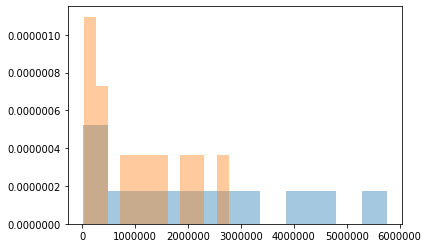

In [138]:
kwargs = dict(histtype='stepfilled', alpha=0.4, normed=True, bins=12)
#total_data
plt.hist(r_surf_monthly['total_data'], **kwargs)
plt.hist(r_ultimate_monthly['total_data'], **kwargs);

### Surf users spend more data in each month, but have less session counts, while Ultimate users spend twice less data than Surf users, but have more session counts.

<div style="border:solid green 4px; padding: 20px">Well done.</div>

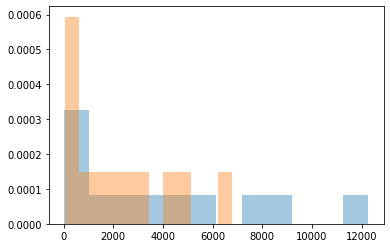

In [139]:
#total messsages
plt.hist(r_surf_monthly['total_msg'], **kwargs)
plt.hist(r_ultimate_monthly['total_msg'], **kwargs);


### Surf users have most total messages sent, but at a lower frequency, while Ultimate users have less total messages sent but at a higher frequency in each month.

### Both Surf and Ultimate users have a higher message count in two months of the year

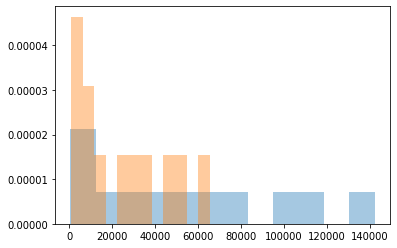

In [140]:
#total minutes
plt.hist(r_surf_monthly['total_minutes'], **kwargs)
plt.hist(r_ultimate_monthly['total_minutes'], **kwargs);


### Surf users have more total minutes spent than Ultimate users.

### They both spend a lot of minutes in two months of the year.

Select columns for correlation and to plot a scatter matrix for each surf and ultimate data slice:

In [141]:
surf_monthly_cols = r_surf_monthly[['total_data', 'total_minutes', 'total_msg']]
surf_monthly_cols.corr()

,total_data,total_minutes,total_msg
total_data,1.000000,0.998721,0.995628
total_minutes,0.998721,1.000000,0.995787
total_msg,0.995628,0.995787,1.000000


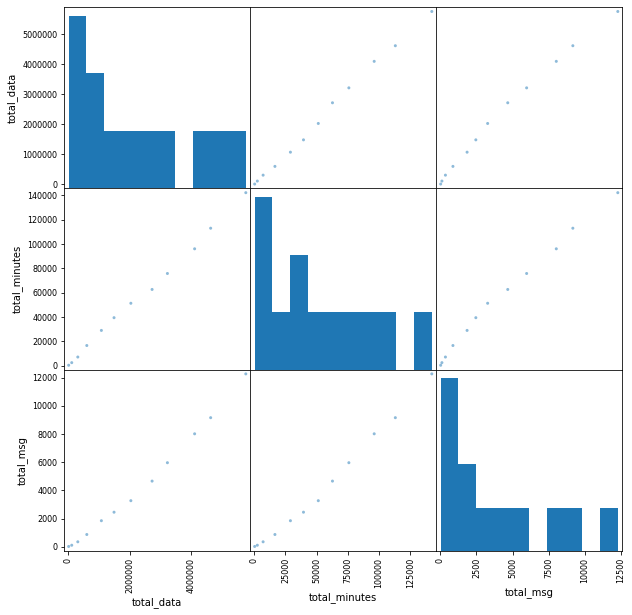

In [142]:
pd.plotting.scatter_matrix(surf_monthly_cols, figsize=(10, 10));

<div style="border:solid green 4px; padding: 20px">Well, that just means that when customers start consuming more traffic - they tend to consume more traffic in all the categories pretty equally.</div>

### There is a direct linear relation between minutes, texts and data usage by Surf users.
This can be seen by a very high, almost +1 correlation.

In [143]:
ultimate_monthly_cols = r_surf_monthly[['total_data', 'total_minutes', 'total_msg']]
ultimate_monthly_cols.corr()

,total_data,total_minutes,total_msg
total_data,1.000000,0.998721,0.995628
total_minutes,0.998721,1.000000,0.995787
total_msg,0.995628,0.995787,1.000000


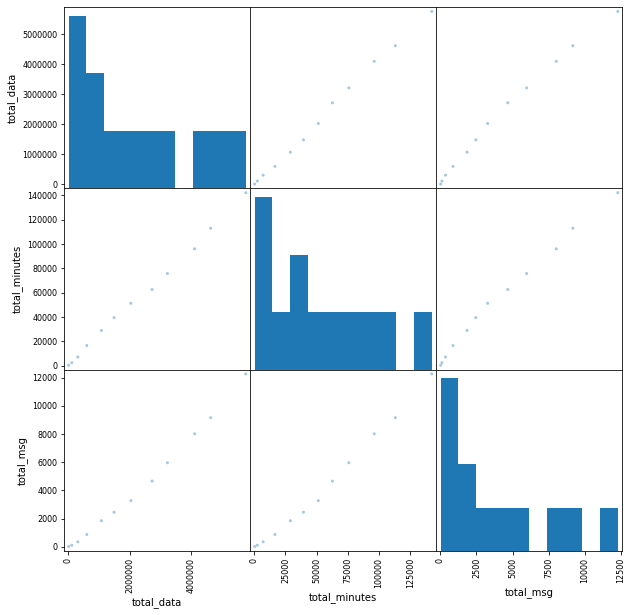

In [144]:
pd.plotting.scatter_matrix(ultimate_monthly_cols,alpha=0.4, figsize=(10, 10));

### There is a direct linear relation between minutes, texts and data usage by Ultimate users.
This can be seen by a very high, almost +1, correlation.

### Test the hypotheses:

1. The average profit from users of Ultimate and Surf calling plans differs.
   - Average profit from Ultimate and Surf is equal.
    - find profit from report, slice into two, and test the null hypothese
2. The average profit from users in NY-NJ area is different from that of the users from other regions.
   - Average profit from NY-NJ and other cities is equal.
    - query users from NY-NJ, and compare to the rest as others

#### A null hypothesis is always stated with an equal sign. It tests whether values in the data are where we expect to find them.

#### An alternative hypothesis is based on the null hypothesis, but opposite.

Null hypotheis: ***The average profit from users of Ultimate and Surf calling plans is equal.***

Alternative hypothesis: ***The average profit from users of Ultimate and Surf calling plans differs.***

In [145]:
from scipy import stats as st

<div style="border:solid #ebd731; 4px; padding: 20px"><a href="https://www.python.org/dev/peps/pep-0008/">PEP 8</a> recommends you to place all your imports into your first cell, so other users would have an opportunity to check if their environment is ready to lanch your project or not by a quick glance on it.</div>

I will select the profit columns of surf and ultimate users.

Criterion:
- I used the hypothesis on the equality of two population means. A higher pvalue supports the null hypothesis: it tells us that the average profit from the two plans is equal.

In [146]:
report_ultimate = report.query('plan == "ultimate"')[['profit']]
report_surf = report.query('plan == "surf"')[['profit']]

In [147]:
alpha = 0.05
plan_results = st.ttest_ind(report_ultimate, report_surf, equal_var=True)
#find pvalue of profit from surf and independent users

In [148]:
plan_results.pvalue

array([1.81006282e-52])

In [149]:
if plan_results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


### Conclusion:

**By  rejecting the null hypothesis,he p-value tells us that the average profit from both users differs.**

Null hypothesis: ***The average profit from users in NY-NJ area and other regions is equal.***

Alternative hypothesis: ***The average profit from users in NY-NJ area is different from that of the users from other regions.***

<div style="border:solid green 4px; padding: 20px">Hypotheses are formulated correctly.</div>

Criterion:
- I used the hypothesis on the equality of two population means. A higher p-value supports the null hypothesis: it tells us that the average profit from the two regions is equal.

In [150]:
users.city.value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Greensboro-High Point, NC MSA                       1
El Paso, TX MSA                                     1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Jacksonville, FL MSA                                1
Stockton, CA MSA                                    1
Name: city, Length: 73, dtype: int64

In [151]:
city_NY = users.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
city_others = users.query('city not in "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [152]:
city_NY = city_NY[['user_id']]
#select user_ids of users in NY-NJ area

In [153]:
report.query('user_id in @city_NY.user_id')['user_id'].nunique() #test the query

80

In [154]:
city_NY = report.query('user_id in @city_NY.user_id')
#slice users from the NY-NJ area from the report

In [155]:
report.query('user_id not in @city_NY.user_id')['user_id'].nunique() #test the query

420

In [156]:
city_others = report.query('user_id not in @city_NY.user_id')

In [157]:
city_others = city_others[['profit']]
city_NY = city_NY[['profit']]
#select the profit column

In [158]:
alpha = 0.05
city_results = st.ttest_ind(city_NY, city_others, equal_var=True)
#select alpha and test independent popultaions for the same mean

In [159]:
print(city_results.pvalue)
#check the pvalue

[0.03495242]


In [160]:
if city_results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
#determine the hypothesis

We reject the null hypothesis


<div style="border:solid green 4px; padding: 20px">Okay, testing is done correctly.</div>

### Conclusion:

**By  rejecting the null hypothesis, the p-value tells us that the average profit from both areas differs.**

## Overall Conclusion:

**There are more Surf users than Ultimate users.**

**The distributions show that Surf users are more profitable than Ultimate users, in minutes, messages and data.**

**The probabilities for both hypotheses are too low to conclude that there are equal average profits for both users and for bth regions.**

*There is a 2.6% chance of randomly getting an equal average profit from users in NY-NJ area and other areas.*
*There is almost 0% chance of randomly getting an equal average profit from Surf and Ultimate users.*

**Users from both Surf and Ultimate use more texts, minutes, and data in the last two months of the year.**


<div style="border:solid green 4px; padding: 20px">Great job overall, we've made necessary data transformations and now we have a representation of what our data is. Although I had slight recommendations - your work is okay and I wish you success at your next projects. See you!</div>